# Congressional Voting Records Predictions

Source: [UCI](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

## Import modules and dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
df = pd.read_csv(url)

In [ ]:
df

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
430,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
431,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
432,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


Note:
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)

In [ ]:
df.columns = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 
              'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
              'el-salvador-aid', 'religious-groups-in-schools', 
              'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
              'mx-missile', 'immigration', 'synfuels-corporation-cutback', 
              'education-spending', 'superfund-right-to-sue', 'crime', 
              'duty-free-exports', 'export-administration-act-south-africa']

In [ ]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


## Data Preprocessing

In [ ]:
df.isna().sum()

Class Name                                0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df.isna().sum()

Class Name                                  0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               20
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Class Name                                0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 4 to 430
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class Name                              232 non-null    object
 1   handicapped-infants                     232 non-null    object
 2   water-project-cost-sharing              232 non-null    object
 3   adoption-of-the-budget-resolution       232 non-null    object
 4   physician-fee-freeze                    232 non-null    object
 5   el-salvador-aid                         232 non-null    object
 6   religious-groups-in-schools             232 non-null    object
 7   anti-satellite-test-ban                 232 non-null    object
 8   aid-to-nicaraguan-contras               232 non-null    object
 9   mx-missile                              232 non-null    object
 10  immigration                             232 non-null    object
 11  synfue

In [ ]:
df['Class Name'].value_counts()

democrat      124
republican    108
Name: Class Name, dtype: int64

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_encode = df.apply(le.fit_transform)

In [ ]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
18,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
22,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
24,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [ ]:
df_encode.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
4,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
7,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
18,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
22,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
24,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


Notes:

{'Democrat':0,
 'Republican':1}

{'n':0, 'y':1}

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_encode.drop('Class Name', axis=1)
y = df_encode['Class Name']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score

In [ ]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "  Gradient Boosting" : GradientBoostingClassifier(),
    "     Neural Network" : MLPClassifier(),
    "      Decision Tree" : DecisionTreeClassifier(),
    "      Random Forest" : RandomForestClassifier(),
    "               K-NN" : KNeighborsClassifier()   
}

In [ ]:
for name, model in models.items():
  model.fit(X_train, y_train)
  print(name + " trained")

Logistic Regression trained
  Gradient Boosting trained
     Neural Network trained
      Decision Tree trained
      Random Forest trained
               K-NN trained


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Results

In [ ]:
acc_save = []
for name, model in models.items():
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(name + " Accuracy: {:.2f}%".format(acc * 100))
  acc_save.append(acc)

Logistic Regression Accuracy: 100.00%
  Gradient Boosting Accuracy: 97.87%
     Neural Network Accuracy: 97.87%
      Decision Tree Accuracy: 97.87%
      Random Forest Accuracy: 97.87%
               K-NN Accuracy: 93.62%


In [ ]:
f1_save = []
for name, model in models.items():
  y_pred = model.predict(X_test)
  f1 = f1_score(y_test, y_pred)
  print(name + " F1 Score: {:.2f}%".format(f1 * 100))
  f1_save.append(f1)

Logistic Regression F1 Score: 100.00%
  Gradient Boosting F1 Score: 97.44%
     Neural Network F1 Score: 97.44%
      Decision Tree F1 Score: 97.44%
      Random Forest F1 Score: 97.44%
               K-NN F1 Score: 92.68%


## Visualization

In [ ]:
model_name = list(models.keys())

In [ ]:
df_compare = pd.DataFrame(list(zip(acc_save, f1_save)), index=[model_name],
                          columns=['acc_test', 'f1_test'])

In [ ]:
df_compare

,acc_test,f1_test
Logistic Regression,1.000000,1.000000
Gradient Boosting,0.978723,0.974359
Neural Network,0.978723,0.974359
Decision Tree,0.978723,0.974359
Random Forest,0.978723,0.974359
K-NN,0.936170,0.926829


Text(0, 0.5, 'Score')

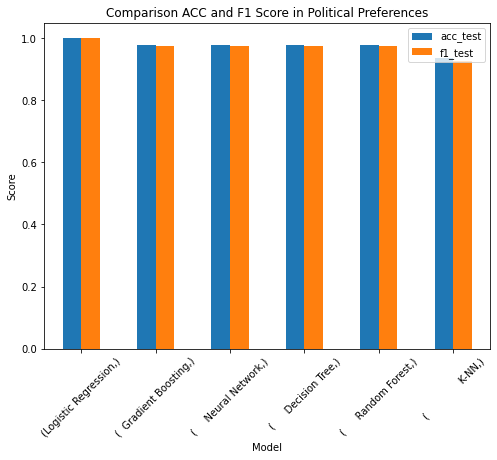

In [ ]:
df_compare.plot(kind='bar', figsize=(8,6))
plt.title('Comparison ACC and F1 Score in Political Preferences')
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.ylabel("Score")

Text(0, 0.5, 'Model')

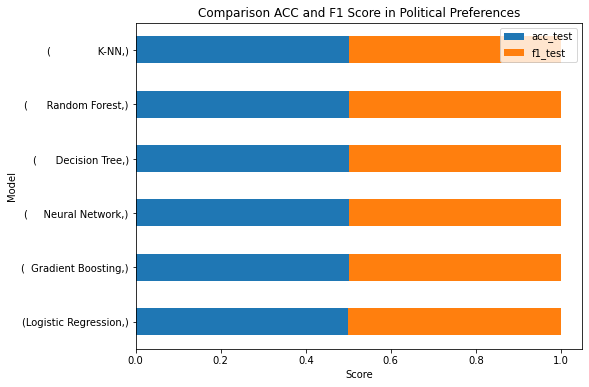

In [ ]:
stacked_data = df_compare.apply(lambda x: x*1 /sum(x), axis=1)
stacked_data.plot(kind='barh', figsize=(8,6), stacked=True)
plt.title('Comparison ACC and F1 Score in Political Preferences')
plt.xlabel('Score')
plt.ylabel('Model')

Best algorithm is most of all except Decision Tree and KNN

## Predictions

In [ ]:
# From df.loc[7]
# example1 = [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
example1 = ['n', 'y', 'n', 'y', 'y', 'y', 'n', 'n', 
            'n', 'n', 'n', 'n', 'y', 'y', 'n', 'y']
len(example1)

16

In [ ]:
example1_encode = le.fit_transform(example1).reshape(1, -1)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.predict(example1_encode)[0]

1

In [ ]:
def predict_me(answer):
  answer_encode = le.fit_transform(answer).reshape(1, -1)
  return rf.predict(answer_encode)[0]

In [ ]:
example2 = ['y', 'y', 'n', 'y', 'y', 'y', 'n', 'n', 
            'n', 'y', 'y', 'y', 'y', 'y', 'n', 'y']

predict_me(example2)

1